In [31]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
print(os.getcwd())


/home/jovyan/final-group09/analysis


In [32]:
df_od_age_group = pd.read_csv("../data/drugoverdosedeaths_by_age_group.csv")
df_od_race = pd.read_csv("../data/drugoverdosedeaths_by_race.csv")

In [33]:
df_od_age_group = df_od_age_group.dropna()
df_od_age_group = df_od_age_group[df_od_age_group["rate"] != ""]

In [34]:
df_od_age_group

,Unnamed: 0,od_cause,sex,age_group,year,rate
0,0,All Deaths,All persons,Under 15 years,1999,0.1
1,1,All Deaths,All persons,15–24 years,1999,3.2
2,2,All Deaths,All persons,25–34 years,1999,8.1
3,3,All Deaths,All persons,35–44 years,1999,14.0
4,4,All Deaths,All persons,45–54 years,1999,11.1
...,...,...,...,...,...,...
3206,3206,Heroin,Female,25–34 years,2017,5.4
3207,3207,Heroin,Female,35–44 years,2017,4.7
3208,3208,Heroin,Female,45–54 years,2017,3.5
3209,3209,Heroin,Female,55–64 years,2017,2.1


In [35]:
# filter for all drug overdose deaths
all_od_deaths = df_od_age_group[df_od_age_group["od_cause"] == "All Deaths"]
all_od_deaths.head(5)

,Unnamed: 0,od_cause,sex,age_group,year,rate
0,0,All Deaths,All persons,Under 15 years,1999,0.1
1,1,All Deaths,All persons,15–24 years,1999,3.2
2,2,All Deaths,All persons,25–34 years,1999,8.1
3,3,All Deaths,All persons,35–44 years,1999,14.0
4,4,All Deaths,All persons,45–54 years,1999,11.1


In [36]:
# get female and make deaths by year
female_ave = all_od_deaths[all_od_deaths["sex"] == "Female"].groupby("year").sum("rate").reset_index()
female_ave["sex"] = "Female"

male_ave = all_od_deaths[all_od_deaths["sex"] == "Male"].groupby("year").sum("rate").reset_index()
male_ave["sex"] = "Male"

# make one dataframe to hold both sums
male_female_ave = pd.concat([male_ave, female_ave])
male_female_ave

,year,Unnamed: 0,rate,sex
0,1999,117,65.0,Male
1,2000,360,66.9,Male
2,2001,603,70.1,Male
3,2002,846,84.3,Male
4,2003,1089,90.0,Male
5,2004,1332,93.1,Male
6,2005,1575,101.6,Male
7,2006,1818,115.8,Male
8,2007,2061,118.1,Male
9,2008,2304,118.1,Male


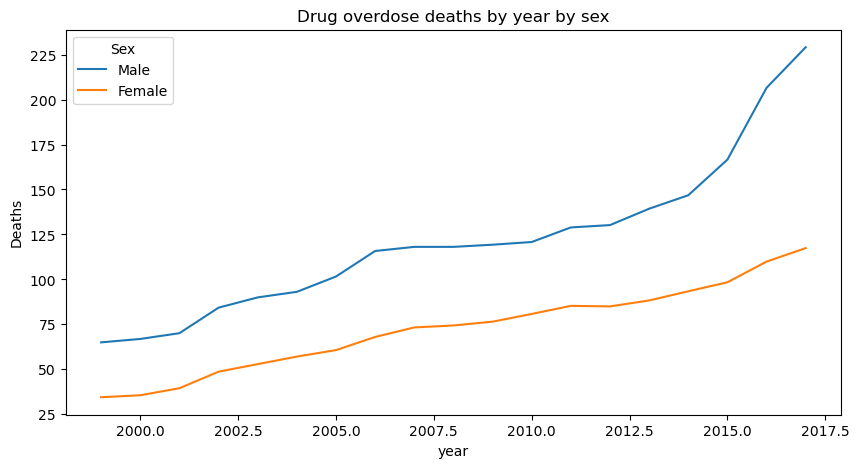

In [37]:
# plot year vs estimated deaths for each sex

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = male_female_ave, x='year', y='rate', hue='sex')

# Add a legend and show the plot
ax.set_ylabel('Deaths')
ax.legend(title= 'Sex')
ax.set_title('Drug overdose deaths by year by sex')
plt.show()

In [38]:
# filter data by age-group 
# TODO: Waiting for cleaned dataset to include age-groups


In [41]:
# heatmap of rates by age x year
# TODO: Create this after age-groups are provided in the data file
# For now, create a dummy heatmap using the data available
heatmap_df = all_od_deaths[['year', 'sex', 'age_group', 'rate']]
heatmap_grouped = heatmap_df.groupby(['year', 'sex', 'age_group']).sum("rate").reset_index() 
heatmap_grouped

,year,sex,age_group,rate
0,1999,All persons,15–24 years,3.2
1,1999,All persons,25–34 years,8.1
2,1999,All persons,35–44 years,14.0
3,1999,All persons,45–54 years,11.1
4,1999,All persons,55–64 years,4.2
...,...,...,...,...
508,2017,Male,55–64 years,36.2
509,2017,Male,65–74 years,11.8
510,2017,Male,75–84 years,3.7
511,2017,Male,85 years and over,4.5


<Axes: xlabel='age_group', ylabel='year'>

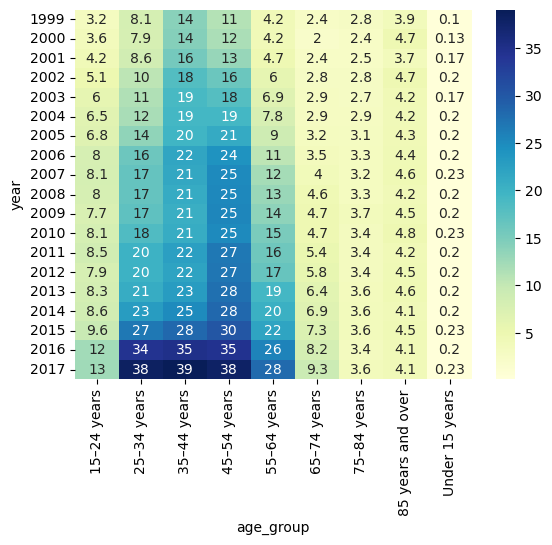

In [42]:
# Pivot the data into a matrix format (months as rows, years as columns)
heatmap_matrix = heatmap_grouped.pivot_table(index="year", columns="age_group", values="rate")
sns.heatmap(heatmap_matrix, annot=True, cmap="YlGnBu")

<Axes: xlabel='sex', ylabel='year'>

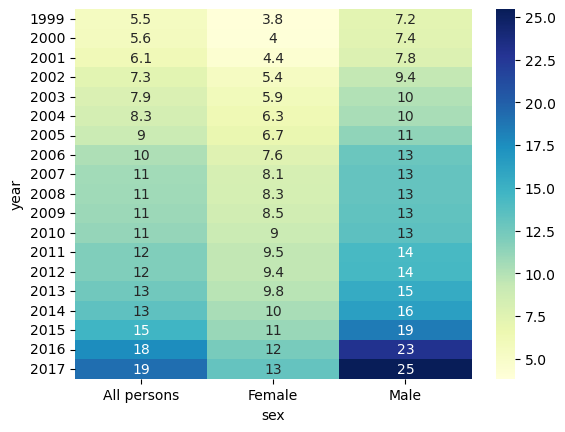

In [43]:
# Pivot the data into a matrix format (months as rows, years as columns)
heatmap_matrix = heatmap_grouped.pivot_table(index="year", columns="sex", values="rate")
sns.heatmap(heatmap_matrix, annot=True, cmap="YlGnBu")